
# 🪙 Gold Price Prediction Project 

This notebook walks through a machine learning model to predict **next-day gold prices** using real-world historical data.  
We apply **time series feature engineering**, build a **Linear Regression model**, and visualize the results.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## Load the Dataset

In [2]:
file_path = r"C:\Users\Aakanksha\OneDrive\Desktop\Project\Gold-Price-Prediction-ML\data\Gold_Futures_Historical_Data_2014-2025.csv" # Path to the CSV file
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)
df.head()


,Date,Price,Open,High,Low,Vol.,Change %
2879,2014-01-14,1245.4,"1,252.70","1,254.90","1,241.10",138.19K,-0.46%
2878,2014-01-15,1238.3,"1,244.30","1,244.60","1,233.50",105.11K,-0.57%
2877,2014-01-16,1240.2,"1,241.80","1,244.90","1,235.80",111.67K,0.15%
2876,2014-01-17,1251.9,"1,241.70","1,254.60","1,237.30",112.72K,0.94%
2875,2014-01-20,1241.8,"1,252.50","1,262.00","1,235.10",174.69K,-0.81%


## Feature Engineering

In [3]:

df['Previous_Close'] = df['Price'].shift(1)
df['Daily_Return_%'] = df['Price'].pct_change() * 100
df['MA_5'] = df['Price'].rolling(window=5).mean()
df['MA_10'] = df['Price'].rolling(window=10).mean()
df['MA_30'] = df['Price'].rolling(window=30).mean()
df['EMA_5'] = df['Price'].ewm(span=5, adjust=False).mean()
df['EMA_10'] = df['Price'].ewm(span=10, adjust=False).mean()
df['EMA_30'] = df['Price'].ewm(span=30, adjust=False).mean()
df['Next_Close'] = df['Price'].shift(-1)
df.dropna(inplace=True)
df.head()


,Date,Price,Open,High,Low,Vol.,Change %,Previous_Close,Daily_Return_%,MA_5,MA_10,MA_30,EMA_5,EMA_10,EMA_30,Next_Close
2850,2014-02-26,1328.0,"1,341.30","1,345.60","1,322.30",149.70K,-1.09%,1342.7,-1.094809,1329.84,1320.77,1276.726667,1329.341479,1318.371038,1287.960697,1331.8
2849,2014-02-27,1331.8,"1,329.50","1,336.40","1,324.00",120.17K,0.29%,1328.0,0.286145,1332.82,1324.45,1279.606667,1330.160986,1320.812667,1290.789039,1321.6
2848,2014-02-28,1321.6,"1,331.30","1,333.60","1,319.30",132.78K,-0.77%,1331.8,-0.765881,1332.42,1326.60,1282.383333,1327.307324,1320.955819,1292.776843,1350.3
2847,2014-03-03,1350.3,"1,332.40","1,355.00","1,330.70",159.74K,2.17%,1321.6,2.171610,1334.88,1329.77,1286.053333,1334.971549,1326.291124,1296.488014,1337.9
2846,2014-03-04,1337.9,"1,350.00","1,352.90","1,331.20",135.60K,-0.92%,1350.3,-0.918314,1333.92,1331.12,1288.920000,1335.947700,1328.401829,1299.159755,1340.3


## Train the ML Model

In [4]:

features = ['Price', 'Previous_Close', 'Daily_Return_%', 'MA_5', 'MA_10', 'MA_30', 'EMA_5', 'EMA_10', 'EMA_30']
X = df[features]
y = df['Next_Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Evaluate the Model

In [5]:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", round(mse, 2))
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 4))


MSE: 257.76
RMSE: 16.05
R² Score: 0.9987


## Visualize Predictions

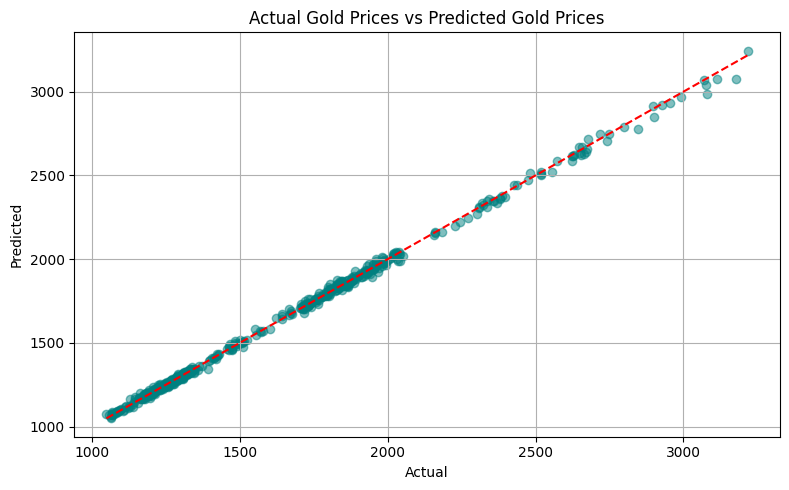

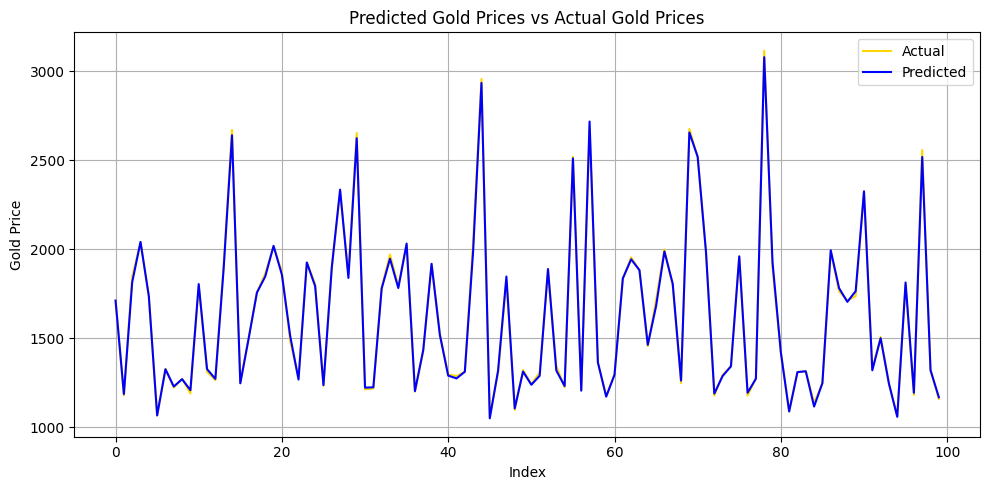

In [6]:

# Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual Gold Prices vs Predicted Gold Prices")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

# Line Plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', color='gold')
plt.plot(y_pred[:100], label='Predicted', color='blue')
plt.title("Predicted Gold Prices vs Actual Gold Prices")
plt.xlabel("Index")
plt.ylabel("Gold Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Conclusion


- The model performs well using engineered features like MAs and EMAs.
- It can be further improved with models like Random Forest or XGBoost.
- Great for understanding ML with time series data in finance.
